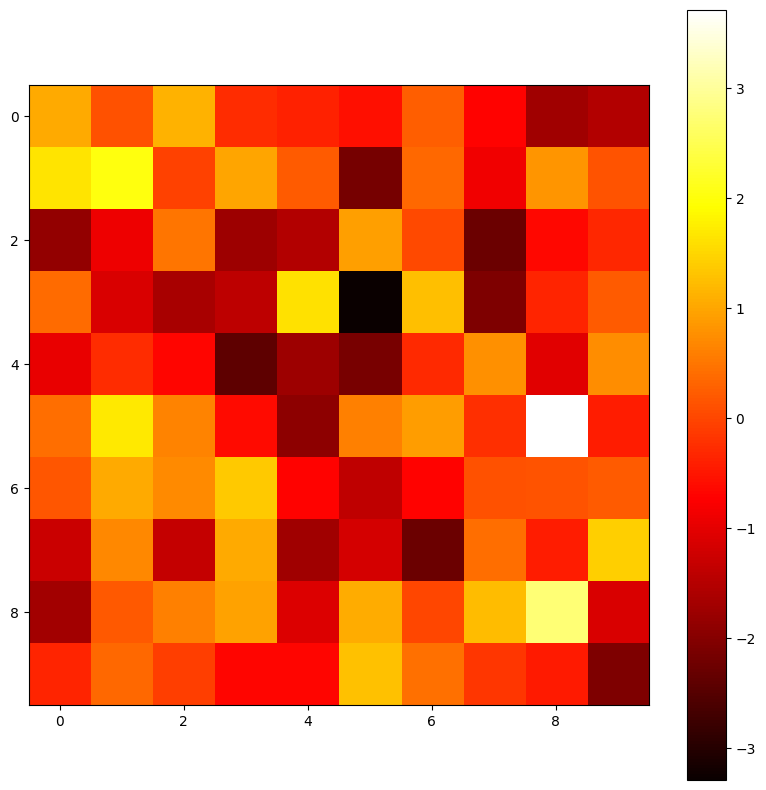

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Define the SOM class
class SelfOrganizingMap(nn.Module):
    def __init__(self, input_size, som_shape, learning_rate=0.1):
        super(SelfOrganizingMap, self).__init__()
        self.som_shape = som_shape
        self.weights = nn.Parameter(torch.randn(som_shape[0] * som_shape[1], input_size))
        self.learning_rate = learning_rate

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = x.unsqueeze(1)  # Add a new dimension for batch
        distances = torch.norm(x - self.weights, dim=2)
        bmu_indices = torch.argmin(distances, dim=1)
        return bmu_indices

    def update_weights(self, x, bmu_indices):
      for i, bmu_index in enumerate(bmu_indices):
          updated_weights = self.weights.clone()  # Create a copy to update
          updated_weights[bmu_index] += self.learning_rate * (x[i] - updated_weights[bmu_index])
          self.weights.data = updated_weights  # Update weights using .data


# Generate synthetic data
data = np.random.rand(100, 2)

# Normalize data to [0, 1]
data = (data - np.min(data)) / (np.max(data) - np.min(data))

# Convert to PyTorch tensor
data_tensor = torch.FloatTensor(data)

# Define SOM parameters
input_size = 2
som_shape = (10, 10)
learning_rate = 0.1
num_epochs = 1000

# Create the SOM
som = SelfOrganizingMap(input_size, som_shape, learning_rate)

# Training loop
for epoch in range(num_epochs):
    bmu_indices = som(data_tensor)
    som.update_weights(data_tensor, bmu_indices)

# Get the final weight matrix
# Convert the final weight matrix to NumPy
# Convert the final weight matrix to NumPy
final_weights = som.weights.data.cpu().numpy()

# Reshape weights to match SOM grid
reshaped_weights = final_weights.reshape(*som_shape, input_size)

# Visualize the SOM with a heatmap-like visualization
plt.figure(figsize=(10, 10))
plt.imshow(reshaped_weights.sum(axis=2), cmap='hot', interpolation='none')
plt.colorbar()
plt.show()


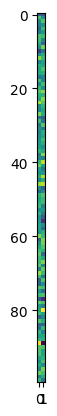

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


class SOM(nn.Module):

  def __init__(self, input_size, som_shape, learning_rate=0.1):
    super().__init__()

    self.som_shape = som_shape
    self.weights = nn.Parameter(torch.randn(som_shape[0]*som_shape[1],input_size))
    self.learning_rate = learning_rate

  def forward(self, x):

    x = x.view(x.size(0), -1)
    x = x.unsqueeze(1)

    distances = torch.norm(x-self.weights,dim=2)
    bmu_indices = torch.argmin(distances,dim=1)
    return bmu_indices

  def update_weights(self, x, bmu_indices):

    for i, bmu_index in enumerate(bmu_indices):
      updated_weights = self.weights.clone()
      updated_weights[bmu_index] += self.learning_rate * (x[i] - updated_weights[bmu_index])
      self.weights.data = updated_weights


# model = SOM(8, (10,10))
# x = torch.randn((10,8))
# out = model(x)
# print(out)

# Generate synthetic data
data = np.random.rand(100, 2)

# Normalize data to [0, 1]
data = (data - np.min(data)) / (np.max(data) - np.min(data))

# Convert to PyTorch tensor
data_tensor = torch.FloatTensor(data)

# Define SOM parameters
input_size = 2
som_shape = (10, 10)
learning_rate = 0.1
num_epochs = 1000

# Create the SOM
som = SOM(input_size, som_shape, learning_rate)

# Training loop
for epoch in range(num_epochs):
    bmu_indices = som(data_tensor)
    som.update_weights(data_tensor, bmu_indices)

# Get the final weight matrix
final_weights = som.weights.data.numpy()

# Visualize the SOM
plt.imshow(final_weights.reshape(100,input_size))
plt.show()